In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# !pip install textattack

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('drive/My Drive/preprocessed_comments.csv')
# train, test = train_test_split(data, test_size=0.2, random_state=42)
print(data.shape)

(34440, 29)


[7545, 0, 3210, 0, 3341, 0, 5456, 0, 14888]


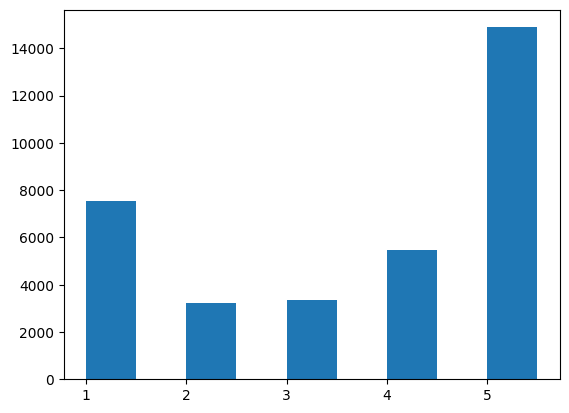

In [37]:
bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
counts = [data[data['Star Rating'] == label].shape[0] for label in bins[:-1]]
print(counts)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

[2604, 5269, 10755, 9978, 5834]


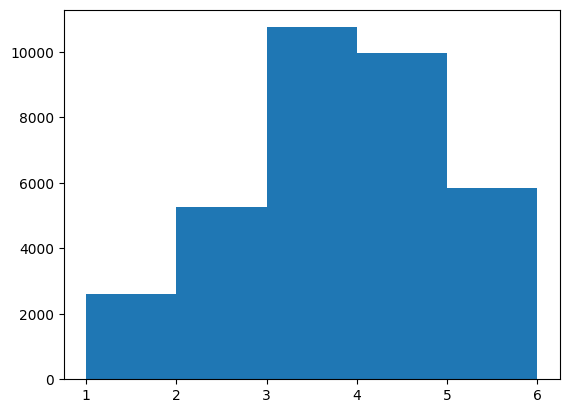

In [36]:
bins = [1, 2, 3, 4, 5, 6]
counts = [data[data['Course Difficulty'] == label].shape[0] for label in bins[:-1]]
print(counts)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

gives_good_feedback         5545
caring                      6333
respected                   5727
participation_matters       4722
clear_grading_criteria      4033
skip_class                     0
amazing_lectures            5872
inspirational               3441
tough_grader                8844
hilarious                   4240
get_ready_to_read           7591
lots_of_homework            4356
accessible_outside_class    4376
lecture_heavy               6308
extra_credit                1427
graded_by_few_things        4584
group_projects              1729
would_take_again             244
skip_class_you_wont_pass    4979
test_heavy                  4652
so_many_papers              1257
beware_of_pop_quizzes        857
tests_are_tough              212
dtype: int64
Number of tags per comment:
3    25690
2     5523
1     3213
0       14
Name: count, dtype: int64


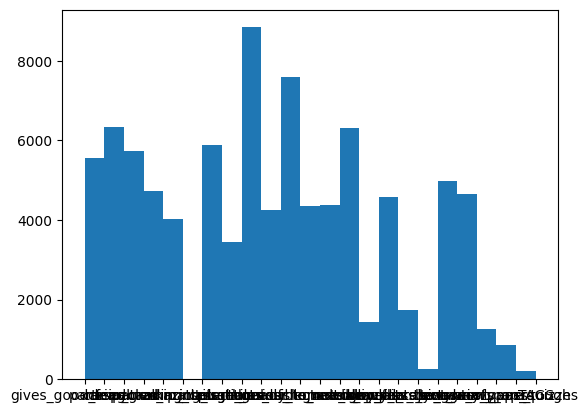

In [24]:
bins = ['gives_good_feedback', 'caring', 'respected', 'participation_matters',
        'clear_grading_criteria', 'skip_class', 'amazing_lectures',
        'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read',
        'lots_of_homework', 'accessible_outside_class', 'lecture_heavy',
        'extra_credit', 'graded_by_few_things', 'group_projects',
        'would_take_again', 'skip_class_you_wont_pass', 'test_heavy',
        'so_many_papers', 'beware_of_pop_quizzes', 'tests_are_tough', 'TAGS']
counts = [data[data[label] == 1].shape[0] for label in bins[:-1]]
print(data.drop(columns=['Professor ID', 'Comment', 'Star Rating', 'Course Difficulty', 'IsCourseOnline', 'noTag']).sum(axis=0))
print(f"Number of tags per comment:\n{data.drop(columns=['Professor ID', 'Comment', 'Star Rating', 'Course Difficulty', 'IsCourseOnline', 'noTag']).sum(axis=1).value_counts()}")
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

In [38]:
# from textattack.augmentation import EmbeddingAugmenter, WordNetAugmenter, CharSwapAugmenter

# text = "Trouble is, if you have different opinions on the topics you talk about then she won\'t like you. As long as you stick to what she lays out you should be good. She wants very badly to have students she molds, if she can\'t mold you she\'ll throw you away."

# ea = EmbeddingAugmenter()
# wna = WordNetAugmenter()
# csa = CharSwapAugmenter()

# augmented_text = ea.augment(wna.augment(csa.augment(text)[0])[0])[0]

# print(f"Original Text: {text}")
# print(f"Augmented Text: {augmented_text}")

In [39]:
# # Create a list of dataframes to be concatenated
# dfs = [train[train['student_star'] == star] for star in [1.5, 2, 2.5, 3, 3.5]]

# # Concatenate the dataframes
# temp = pd.concat(dfs, ignore_index=True)

# print(temp.shape)

In [40]:
# dfs[0]['comments'] = dfs[0]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
# print(dfs[0]['comments'].head())

In [ ]:
dfs[1]['comments'] = dfs[1]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[1]['comments'].head())

In [ ]:
dfs[2]['comments'] = dfs[2]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[2]['comments'].head())

In [ ]:
dfs[3]['comments'] = dfs[3]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[3]['comments'].head())

In [ ]:
dfs[4]['comments'] = dfs[4]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[4]['comments'].head())

In [ ]:
train = pd.concat([data, *dfs], ignore_index=True)
print(train.shape)

In [ ]:
train = train.drop(train[train['student_star'] == 5].sample(frac=0.6).index)
print(train.shape)

In [ ]:
train.to_csv('sample_data/augmented_trainONLY.csv', index=False)